In [1]:
import numpy as np
import pandas as pd
import pickle
%matplotlib inline
%config InlineBackend.figure_format='retina'
from utils import get_image_arrays, get_image_predictions, show_image

# Hateful Memes 

In [2]:
image_path = '/Users/amansolanki/datasets/hateful-memes-images/'
test_seen_original = pd.read_csv('/Users/amansolanki/PycharmProjects/hateful-memes-challenge/data/test_seen.csv')
test_seen = test_seen_original.sample(1, random_state=23)
y_true = test_seen['label']
image_id = test_seen['image_id']
text = test_seen['text']

# Image

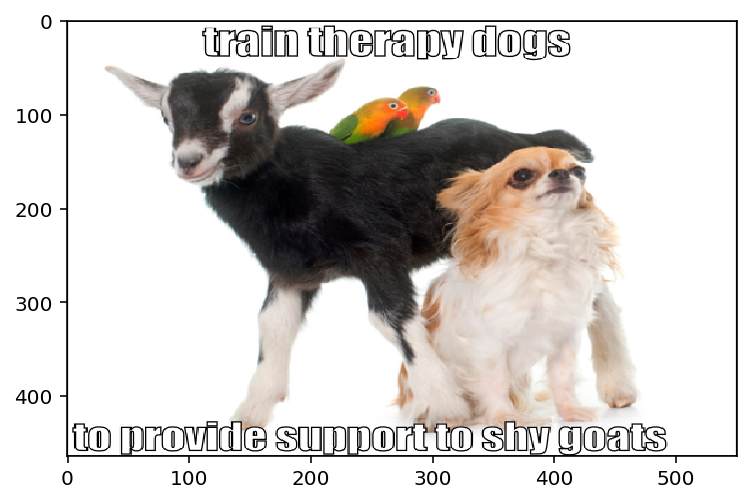

In [3]:
show_image(image_id, image_path)

# Image Unimodel

In [4]:
TFLITE_FILE_PATH = '/Users/amansolanki/PycharmProjects/hateful-memes-challenge/src/image/image_model.tflite'
image_array = get_image_arrays(image_id, image_path)
image_prediction = get_image_predictions(image_array, TFLITE_FILE_PATH)
y_pred_image = np.argmax(image_prediction, axis=1)
print('Image Prediction Probabilities:')
print(image_prediction)

Image Prediction Probabilities:
[[0.48547384 0.62665254]]


# TFIDF Text Unimodal Model

In [5]:
model = '/Users/amansolanki/PycharmProjects/hateful-memes-challenge/src/text/tfidf_model.pickle'
vectorizer = '/Users/amansolanki/PycharmProjects/hateful-memes-challenge/src/text/tfidf_vectorizer.pickle'
tfidf_model = pickle.load(open(model, 'rb'))
tfidf_vectorizer = pickle.load(open(vectorizer, 'rb'))
transformed_text = tfidf_vectorizer.transform(text)
text_prediction = tfidf_model.predict_proba(transformed_text)
y_pred_text = np.argmax(text_prediction, axis=1)
print('Text Prediction Probabilities:')
print(text_prediction)

Text Prediction Probabilities:
[[0.73255099 0.26744901]]


# Ensemble Probabilities

In [6]:
ensemble_prediction = np.mean(np.array([image_prediction, text_prediction]), axis=0)
y_pred_ensemble = np.argmax(ensemble_prediction, axis=1)
print('Ensemble Prediction Probabilities:')
print(ensemble_prediction)

Ensemble Prediction Probabilities:
[[0.60901241 0.44705078]]


# Results

In [7]:
print('True Label: ', list(dict(y_true).values())[0])
print('Predicted Label: ', y_pred_ensemble[0])

True Label:  0
Predicted Label:  0


In [ ]:
# label where 1 -> "hateful" and 0 -> "non-hateful"